In [25]:
import pandas as pd

In [26]:
df = pd.read_csv(r"C:\Desktop\github_projects\ML\datasets\Social_Network_Ads.csv")

In [27]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

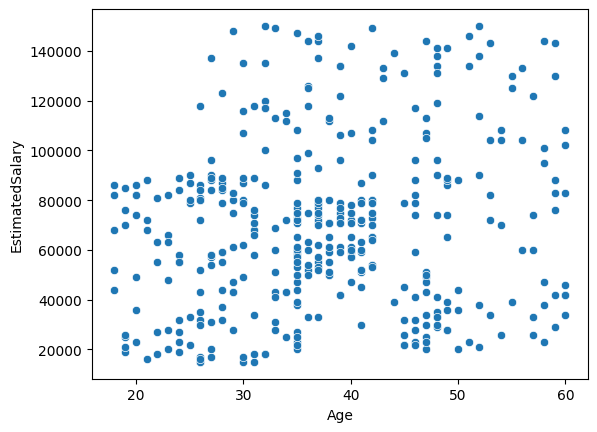

In [28]:
import seaborn as sns

sns.scatterplot(x= df.iloc[:,0], y = df.iloc[:,1])

In [29]:
df.shape

(400, 3)

In [30]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [32]:
print(x_train.shape)
print(type(x_train))

(320, 2)
<class 'pandas.core.frame.DataFrame'>


In [33]:
import torch
import torch.nn as nn

In [34]:
class NN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.nn = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.nn(x)
        return x
    

In [35]:
model = NN(num_features=2)

In [36]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [37]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

In [38]:
x_train_tensor = torch.tensor(x_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype = torch.float32).unsqueeze(1)

x_test_tensor = torch.tensor(x_test.to_numpy(), dtype= torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

In [39]:
train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
test_dataset = TensorDataset(x_test_tensor,y_test_tensor)

train_loader  = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size =32)


In [40]:
for epoch in range(10):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct+= (predicted == batch_y).sum().item()
        total+= batch_y.size(0)

    acc = correct/total
    print(f"[Train] Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")
    

[Train] Epoch 1, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 2, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 3, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 4, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 5, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 6, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 7, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 8, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 9, Loss: 362.5000, Accuracy: 0.6375
[Train] Epoch 10, Loss: 362.5000, Accuracy: 0.6375


In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        all_preds.extend(probs.numpy())
        all_labels.extend(batch_y.numpy())

# Convert to arrays
import numpy as np
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
predicted_classes = (all_preds > 0.5).astype(int)
accuracy = accuracy_score(all_labels, predicted_classes)
roc_auc = roc_auc_score(all_labels, all_preds)

print(f"[Test] Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")


[Test] Accuracy: 0.6625, ROC AUC: 0.5000


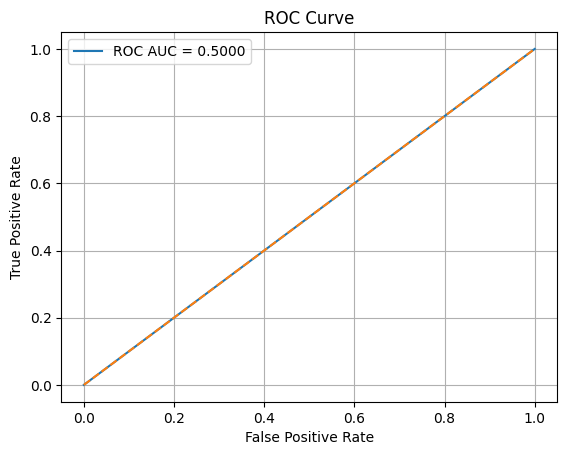

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(all_labels, all_preds)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
